# Create Norway elevation map + MEPS area using Etopo1 and matplotlib
http://www.trondkristiansen.com/?page_id=846


https://www.ngdc.noaa.gov/mgg/global/global.html

In [1]:
import os, sys, datetime, string
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/Norway_map/')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/MEPS/')
import matplotlib.pyplot as plt
import pandas as pd

import createFolder as cF
from netCDF4 import Dataset
import numpy as np
#import laplaceFilter
#from mpl_toolkits.basemap import Basemap, cm
import matplotlib.colors as colors
import fct_maps as fcm

from fcts_read_stat import find_station_yx

In [2]:
import gdal
from pyproj import Proj, transform

In [3]:
station = 'Haukeliseter'
savefig = 0   # 1 = yes, 0 = no
fig_dir = '../../Figures/Norway_map/%s' %station
form = 'png'

In [4]:
stn_lat = 59.81
stn_lon = 7.21

In [5]:
txt_dir = '../../Data/Eklima/Hordaland_Telemark_stations.txt' 

In [6]:
txt_open = pd.read_csv(txt_dir, sep =';', header=2, skipfooter = 0, engine = 'python')

stn_name = txt_open['Name']
stn_nr   = txt_open['Stnr']
lat      = txt_open['Latitude']
lon      = txt_open['Longitude']

In [7]:
def get_kartverket_data(filename):
    inProj = Proj(init='EPSG:32633')
    outProj = Proj(init='EPSG:4326')
    
    
    gdal_data = gdal.Open(filename)
    gt = gdal_data.GetGeoTransform()

    gdal_band = gdal_data.GetRasterBand(1)
    nodataval = gdal_band.GetNoDataValue()

    # convert to a numpy array
    data_array = gdal_data.ReadAsArray().astype(np.float)

    # replace missing values if necessary
    if np.any(data_array == nodataval):
        data_array[data_array == nodataval] = np.nan


    xres = gt[1]
    yres = gt[5]

    x = np.arange(gt[0], gt[0]+data_array.shape[1]*xres, xres)
    y = np.arange(gt[3], gt[3]+data_array.shape[0]*yres, yres)
    X, Y = np.meshgrid(x,y)

    lon1, lat1 = X,Y
    
    lono1, lato1 = transform(inProj, outProj, lon1,lat1)
    return(lono1, lato1, data_array)

In [45]:
lon65m_1, lat65m_1, data_array65m_1 = get_kartverket_data('65m1_1_10m_z33.tif')
lon65m_4, lat65m_4, data_array65m_4 = get_kartverket_data('65m1_4_10m_z33.tif')

In [ ]:
lon66m_1, lat66m_1, data_array66m_1 = get_kartverket_data('66m1_1_10m_z33.tif')
lon66m_2, lat66m_2, data_array66m_2 = get_kartverket_data('66m1_2_10m_z33.tif')
lon66m_3, lat66m_3, data_array66m_3 = get_kartverket_data('66m1_3_10m_z33.tif')
lon66m_4, lat66m_4, data_array66m_4 = get_kartverket_data('66m1_4_10m_z33.tif')

In [8]:
lon65_1, lat65_1, data_array65_1 = get_kartverket_data('6501_1_10m_z33.tif')
lon65_2, lat65_2, data_array65_2 = get_kartverket_data('6501_4_10m_z33.tif')
lon65_3, lat65_3, data_array65_3 = get_kartverket_data('6502_4_10m_z33.tif')


In [9]:
lon66_1, lat66_1, data_array66_1 = get_kartverket_data('6600_1_10m_z33.tif')
lon66_2, lat66_2, data_array66_2 = get_kartverket_data('6600_2_10m_z33.tif')
lon66_3, lat66_3, data_array66_3 = get_kartverket_data('6600_3_10m_z33.tif')
lon66_4, lat66_4, data_array66_4 = get_kartverket_data('6600_4_10m_z33.tif')
lon66_5, lat66_5, data_array66_5 = get_kartverket_data('6601_1_10m_z33.tif')
lon66_6, lat66_6, data_array66_6 = get_kartverket_data('6601_2_10m_z33.tif')
lon66_7, lat66_7, data_array66_7 = get_kartverket_data('6601_3_10m_z33.tif')
lon66_8, lat66_8, data_array66_8 = get_kartverket_data('6601_4_10m_z33.tif')
lon66_9, lat66_9, data_array66_9 = get_kartverket_data('6602_3_10m_z33.tif')
lon66_10, lat66_10, data_array66_10 = get_kartverket_data('6602_4_10m_z33.tif')

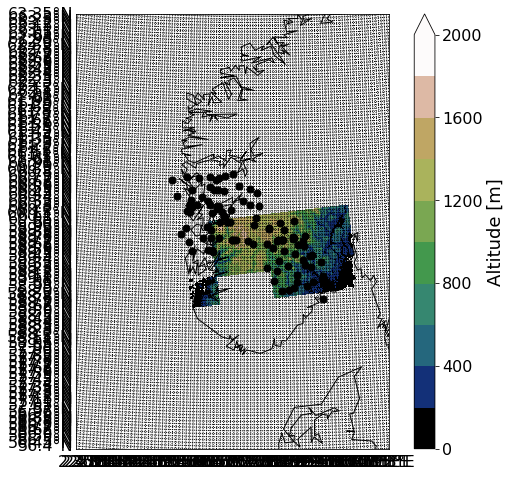

In [46]:
fig = plt.figure(figsize=(9,8))
plt.clf()

map=fcm.Lambert_map(lllon=np.min(lon)-2.5, lllat=np.min(lat)-2.5, 
                  urlon=np.max(lon)+2.5, urlat=np.max(lat)+2.5, 
                  lat0= stn_lat, lon0= stn_lon, res='l', fill=False,zoom=True)

LON1, LAT1 = map(lon66_1, lat66_1)
LON2, LAT2 = map(lon66_2, lat66_2)
LON3, LAT3 = map(lon66_3, lat66_3)
LON4, LAT4 = map(lon66_4, lat66_4)
LON5, LAT5 = map(lon66_5, lat66_5)
LON6, LAT6 = map(lon66_6, lat66_6)
LON7, LAT7 = map(lon66_7, lat66_7)
LON8, LAT8 = map(lon66_8, lat66_8)
LON9, LAT9 = map(lon66_9, lat66_9)
LON10, LAT10 = map(lon66_10, lat66_10)
LON11, LAT11 = map(lon65_1, lat65_1)
LON12, LAT12 = map(lon65_2, lat65_2)
LON13, LAT13 = map(lon65_3, lat65_3)
LON14, LAT14 = map(lon65m_1, lat65m_1)
LON15, LAT15 = map(lon65m_4, lat65m_4)

levels = np.arange(0,2100,50)
levels = levels[::4]

#fcm.PlotContours(LON1, LAT1, data_array1, map, leveldist=None, levels=levels[::2], numbers=True, color = 'gray')
#fcm.PlotContours(LON2, LAT2, data_array2, map, leveldist=None, levels=levels[::2], numbers=True, color = 'gray')
#fcm.PlotContours(LON3, LAT3, data_array3, map, leveldist=None, levels=levels[::2], numbers=True, color = 'gray')
#fcm.PlotContours(LON4, LAT4, data_array4, map, leveldist=None, levels=levels[::2], numbers=True, color = 'gray')

norm = colors.BoundaryNorm(boundaries = levels, ncolors=plt.cm.gist_earth.N)

cs = map.contourf(LON1, LAT1, data_array66_1, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON2, LAT2, data_array66_2, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON3, LAT3, data_array66_3, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON4, LAT4, data_array66_4, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON5, LAT5, data_array66_5, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON6, LAT6, data_array66_6, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON7, LAT7, data_array66_7, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON8, LAT8, data_array66_8, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON9, LAT9, data_array66_9, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON10, LAT10, data_array66_10, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON11, LAT11, data_array65_1, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON12, LAT12, data_array65_2, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON13, LAT13, data_array65_3, levels,norm=norm, cmap=plt.cm.gist_earth, extend='max')
map.contourf(LON14, LAT14, data_array65m_1, levels,norm=norm, cmap=plt.cm.gist_earth,extend='max')
map.contourf(LON14, LAT15, data_array65m_4, levels,norm=norm, cmap=plt.cm.gist_earth,extend='max')



cb = plt.colorbar(cs, boundaries=levels, extend='max')
cb.set_label('Altitude [m]', size=18)
cb.ax.tick_params(labelsize=16)
plt.gca().set_aspect('equal', adjustable='box')

cb.ax.set_xticklabels(np.arange(700,2100,50)[::4])

for k in range(lon.shape[0]):
    xpt, ypt = map(lon[k], lat[k])
    map.plot(xpt, ypt, 'ko', markersize = 7)
xpt, ypt = map(stn_lat, stn_lat)
map.plot(xpt,ypt, 'rx', markersize = 7)

if savefig == 1:
    cF.createFolder(fig_dir)
    fig_name = 'elevation_Haukeli.'+form
    plt.savefig('%s/%s' %(fig_dir,fig_name), format = form, bbox_inches = 'tight')
    print('plot saved: %s/%s' %(fig_dir,fig_name))
else:
    plt.show()
plt.close()

In [24]:
lat.shape

(112,)

In [35]:
llat = np.repeat(np.array(lat), lon.shape[0])
llon = np.repeat(np.array(lon), lat.shape[0])
llat = (np.reshape(llat, newshape = (lat.shape[0], lon.shape[0]),order='F'))
llon = np.reshape(llon, newshape = (lat.shape[0], lon.shape[0]), order='F')

loni = np.array(np.arange(np.min(lon)-0.25,np.max(lon)+0.25,0.01))
xx = []
yy = []
for i in range(loni.shape[0]):
    x,y = find_station_yx(llat, llon, stn_lat, loni[i])
    xx.append(x)
    yy.append(y)
    
for i in range(loni.shape[0]-1):
    if xx[i].all() == xx[i+1].all():
        #print(i, xx[i], xx[i+1])
        xx[i] = np.nan
        
    if yy[i].all() == yy[i+1].all():
        yy[i] = np.nan